In [74]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
import statsmodels.api as sm
from scipy import stats
import math
from sklearn.linear_model import LassoLarsIC, LogisticRegression
import seaborn as sn 
from matplotlib import pyplot as plt

## Ex 1

In [2]:
df = pd.read_csv('saheart.dat', skiprows=14, header=None)
df.columns = ['Sbp','Tobacco','Ldl','Adiposity','Famhist','Typea','Obesity','Alcohol','Age','Chd']
df['Famhist'] = df['Famhist'].apply(lambda x: 1 if x == 'Present' else 0)
df.head()

,Sbp,Tobacco,Ldl,Adiposity,Famhist,Typea,Obesity,Alcohol,Age,Chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


### Fit logistic regression model, treating chd as response variable

In [5]:
y = df['Chd']
X = df.drop('Chd', axis=1)

X2 = sm.add_constant(X)
est = sm.Logit(y, X2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 0.510974
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    Chd   No. Observations:                  462
Model:                          Logit   Df Residuals:                      452
Method:                           MLE   Df Model:                            9
Date:                Mon, 14 Mar 2022   Pseudo R-squ.:                  0.2080
Time:                        12:54:18   Log-Likelihood:                -236.07
converged:                       True   LL-Null:                       -298.05
Covariance Type:            nonrobust   LLR p-value:                 2.055e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.1507      1.308     -4.701      0.000      -8.715      -3.587
Sbp            0.0065      0.

### Which variables are significant in the full model?

#### Tobacco Ldl Famhist Typea Age

### Compute odds ratio for the logistic model in which we increase variable Age by 1, whereas all remaining variables are fixed

In [11]:
B_age = est2.params.values[-1]
math.e**B_age

1.046263608466679

### Perform feature selection using information criteria AIC and BIC

In [16]:
model = LassoLarsIC().fit(X, y)
[X.columns[i] for i in range(len(model.coef_)) if model.coef_[i] != 0]

['Sbp', 'Tobacco', 'Ldl', 'Famhist', 'Typea', 'Obesity', 'Age']

In [17]:
model = LassoLarsIC('bic').fit(X, y)
[X.columns[i] for i in range(len(model.coef_)) if model.coef_[i] != 0]

['Tobacco', 'Ldl', 'Famhist', 'Typea', 'Age']

## Ex 2

In [21]:
df = pd.read_csv('earthquake.txt', sep=' ')

### Make scatterplot for variables body and surface. Mark classes corresponding to observations

<AxesSubplot:xlabel='body', ylabel='surface'>

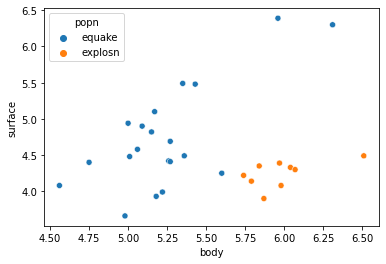

In [25]:
sn.scatterplot(x='body', y='surface', hue='popn', data=df)

### Fit logistic model and perform Wald test (test for significance of the coefficients). 

In [30]:
df['popn'] = df['popn'].apply(lambda x: 1 if x == 'equake' else 0)

In [31]:
y = df['popn']
X = df.drop('popn', axis=1)

X2 = sm.add_constant(X)
est = sm.Logit(y, X2)
est2 = est.fit()
print(est2.summary())

         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                   popn   No. Observations:                   29
Model:                          Logit   Df Residuals:                       26
Method:                           MLE   Df Model:                            2
Date:                Mon, 14 Mar 2022   Pseudo R-squ.:                   1.000
Time:                        13:12:00   Log-Likelihood:            -4.0121e-08
converged:                      False   LL-Null:                       -17.962
Covariance Type:            nonrobust   LLR p-value:                 1.582e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        963.3217   4.45e+06      0.000      1.000   -8.73e+06    8.73e+06
body        -234.6354   1.87e+05     -0.001      0.999   -3.67e+0

/home/samba/kurekk/.local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### How to explain the fact that the test indicates that both variables are not significant in the full model?
Class are linearly separable and logistic regression model can't choose which linear function is the best separator. This is a source of converge failure. 

## Ex 3

In [90]:
ns = [50, 60, 100, 150, 200, 250, 300]
L = 500
B = np.array([0.0, 1.0, 1.0]).reshape(1, 3)
MSEs = []
for n in ns:
    print(n)
    tmp_mses = []
    for _ in range(L):
        X = np.random.normal(0, 1, size=(n,2))
        X = np.concatenate([np.ones(shape=(n,1)), X], axis=1) # I add interecpt to data...

        p = 1.0/(1.0 + np.exp(-B@X.T)).flatten()
        y = np.random.binomial(n=1, p=p)


        model = LogisticRegression(penalty='none', fit_intercept=False).fit(X, y) # ...so I skip intercept here
        mse = (model.coef_.flatten() - B)**2
        mse = np.sqrt(mse@mse.T)
        tmp_mses.append(mse)
    MSEs.append(np.mean(tmp_mses))

50
60
100
150
200
250
300


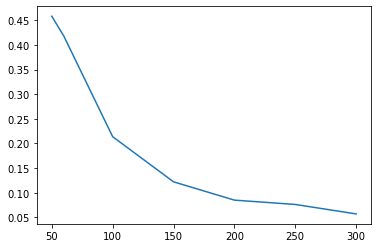

In [91]:
plt.plot(ns, MSEs)